In [14]:
# base line with scaling
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import seaborn as sns 
from datetime import datetime
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.io import loadmat
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import integrate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy import *

def evol_model(t, K, p0, m0, S, p1, m1, 
              p2, m2, p3, m3, p4, m4,
              p5, m5, p6, m6, p7, m7,
              p8, m8, p9, m9, p10, m10,
              p11, m11, p12, m12, p13, m13,
              p14, m14, p15, m15, p16, m16,
              p17, m17, p18, m18, p19, m19,
              rp, rm, Gs, D, fR,
              per_mut, mut_scale,
              two_step_scaling,
              five_step_scaling,
              ten_step_scaling,
              fifteen_step_scaling,
              twenty_step_scaling, title_string, time_steps):
  now = datetime.now()            
  current_time = now.strftime("%m_%d_%Y%H_%M_%S")
  my_dir = '/Users/mfroid/Desktop/ODE_model_data/'
  path = my_dir + title_string +'_'+ current_time
  os.mkdir(path)            
  # single step
  up = per_mut
  um = up * mut_scale
  A = 1
  n = A-1

  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4])/K) - (fR+D))
    dpdt = spr[1] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4])/K)) 
        - ((A-0)/A + D) - up
        )
    dmdt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4])/K)) 
        - ((A-0)/A + D) - um
        )
    drpdt = spr[3] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4])/K)) - ((A-1)/A + D)) + (spr[1] * up)
    drmdt = spr[4] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4])/K)) - ((A-1)/A + D)) + (spr[2] * um)
    dspmdt = [dsdt, dpdt, dmdt, drpdt, drmdt]#, dpdt, dmdt, drdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df1 = pd.DataFrame(s_p_r, columns=['Sensitive', 'Persister', 'Mutator', 'Resistant Persister', 'Resistant Mutator'])
  df1['Time'] = range(0, time_steps)
  df1['Total Cells'] = (df1['Sensitive'] + df1['Persister'] + df1['Mutator'] + df1['Resistant Persister'] + df1['Resistant Mutator'])
  df1['Total Persister Cells'] = (df1['Persister'] + df1['Resistant Persister'])
  df1['Total Mutator Cells'] = (df1['Mutator'] + df1['Resistant Mutator'])
  df1['Resistant'] = (df1['Resistant Persister'] + df1['Resistant Mutator'])
  df1['Sensitive Fraction'] = df1['Sensitive']/df1['Total Cells']
  df1['Persister Fraction'] = (df1['Persister'] + df1['Resistant Persister'])/df1['Total Cells']
  df1['Mutator Fraction'] = (df1['Mutator'] + df1['Resistant Mutator'])/df1['Total Cells']
  df1['Resistant Fraction'] = df1['Resistant']/df1['Total Cells']

  # two step
  up = per_mut * two_step_scaling
  um = up * mut_scale
  A = 2
  n = A-1

  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K) - (fR+D))

    dp0dt = spr[1] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) 
        - ((A-0)/A + D) - up
        ) 
    dm0dt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) 
        - ((A-0)/A + D) - um
        ) 
    dp1dt = spr[3] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) 
        - ((A-1)/A + D) - up
        ) + (spr[1] * up)
    dm1dt = spr[4] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) 
        - ((A-1)/A + D) - um
        ) + (spr[2] * um)
    drpdt = spr[5] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) - ((A-5)/A + D)) + (spr[3] * up)
    drmdt = spr[6] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                                  spr[4] +spr[5] + spr[6])/K)) - ((A-5)/A + D)) + (spr[4] * um)
    dspmdt = [dsdt, dp0dt, dm0dt, dp1dt, dm1dt, drpdt, drmdt]#, dpdt, dmdt, drdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, p1, m1, rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df2 = pd.DataFrame(s_p_r, columns=['Sensitive', 'Persister0', 'Mutator0', 
                                      'Persister1', 'Mutator1', 
                                     'Resistant Persister', 'Resistant Mutator'])
  df2['Time'] = range(0, time_steps)
  df2['Total Cells'] = (df2['Sensitive'] +
                      df2['Persister0'] + df2['Mutator0'] +
                      df2['Persister1'] + df2['Mutator1'] + 
                      df2['Resistant Persister'] + df2['Resistant Mutator'])
  df2['Total Persister Cells'] = (df2['Persister0'] + df2['Persister1'] + df2['Resistant Persister'])  
  df2['Total Mutator Cells'] = (df2['Mutator0'] + df2['Mutator1'] + df2['Resistant Mutator'])            
  df2['Resistant'] = (df2['Resistant Persister'] + df2['Resistant Mutator'])
  df2['Sensitive Fraction'] = df2['Sensitive']/df2['Total Cells']
  df2['Persister Fraction'] = (df2['Persister0'] + df2['Persister1'] + df2['Resistant Persister'])/df2['Total Cells']
  df2['Mutator Fraction'] = (df2['Mutator0'] + df2['Mutator1'] + df2['Resistant Mutator'])/df2['Total Cells']
  df2['Resistant Fraction'] = df2['Resistant']/df2['Total Cells']

  # Five Steps
  # time points
  up = per_mut * five_step_scaling
  um = up * mut_scale 
  A = 5
  n = A-1

  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10])/K) - (fR+D))

    dp0dt = spr[1] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-0)/A + D) - up
        )
    dm0dt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-0)/A + D) - um
        )
    dp1dt = spr[3] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-1)/A + D) - up
        ) + (spr[1] * up)
    dm1dt = spr[4] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-1)/A + D) - um
        ) + (spr[2] * um)
    dp2dt = spr[5] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-2)/A + D) - up
        ) + (spr[3] * up)
        
    dm2dt = spr[6] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-2)/A + D) - um) + (spr[4] * um)

    dp3dt = spr[7] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-3)/A + D) - up) + (spr[5] * up)
        
    dm3dt = spr[8] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-3)/A + D) - um) + (spr[6] * um)

    dp4dt = spr[9] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-4)/A + D) - up) + (spr[7] * up)

    dm4dt = spr[10] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) 
        - ((A-4)/A + D) - um) + (spr[8] * um)
      
    drpdt = spr[11] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) - ((A-5)/A + D)) + (spr[9] * up)
      
    drmdt = spr[12] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + 
                spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + 
                spr[10] + spr[11] + spr[12])/K)) - ((A-5)/A + D)) + (spr[10] * um)
      
    dspmdt = [dsdt, dp0dt, dm0dt, dp1dt, dm1dt, dp2dt, dm2dt, dp3dt, dm3dt, dp4dt, dm4dt, drpdt, drmdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, p1, m1, p2, m2, p3, m3, p4, m4, rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df5 = pd.DataFrame(s_p_r, columns=['Sensitive',
                                    'Persister0', 'Mutator0', 
                                    'Persister1', 'Mutator1', 
                                    'Persister2', 'Mutator2', 
                                    'Persister3', 'Mutator3', 
                                    'Persister4', 'Mutator4', 
                                    'Resistant Persister', 'Resistant Mutator'])
  df5['Time'] = range(0, time_steps)
  df5['Total Cells'] = (df5['Sensitive'] +
                      df5['Persister0'] + df5['Mutator0'] + 
                      df5['Persister1'] + df5['Mutator1'] + 
                      df5['Persister2'] + df5['Mutator2'] + 
                      df5['Persister3'] + df5['Mutator3'] + 
                      df5['Persister4'] + df5['Mutator4'] + 
                      df5['Resistant Persister'] + df5['Resistant Mutator'])
  df5['Total Persister Cells'] = (df5['Persister0'] + df5['Persister1'] + df5['Persister2'] + 
                              df5['Persister3']+ df5['Persister4'] + df5['Resistant Persister'])
  df5['Total Mutator Cells'] = (df5['Mutator0'] + df5['Mutator1'] + df5['Mutator2'] + 
                            df5['Mutator3'] + df5['Mutator4'] + df5['Resistant Mutator'])                                           
  df5['Resistant'] = (df5['Resistant Persister'] + df5['Resistant Mutator'])
  df5['Sensitive Fraction'] = df5['Sensitive']/df5['Total Cells']

  df5['Persister Fraction'] = (df5['Persister0'] + df5['Persister1'] + df5['Persister2'] + 
                              df5['Persister3']+ df5['Persister4']
                              + df5['Resistant Persister'])/df5['Total Cells']
  df5['Mutator Fraction'] = (df5['Mutator0'] + df5['Mutator1'] + df5['Mutator2'] + 
                            df5['Mutator3'] + df5['Mutator4'] +
                            df5['Resistant Mutator'])/df5['Total Cells']
  df5['Resistant Fraction'] = df5['Resistant']/df5['Total Cells']

  # Ten steps
  up = per_mut * ten_step_scaling
  um = up * mut_scale
  A = 10
  n = A-1
  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K) - (fR+D))
    dp0dt = spr[1] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-0)/A + D) - up
        )

    dm0dt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-0)/A + D) - um
        )

    dp1dt = spr[3] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-1)/A + D) - up) + (spr[1] * up)
        
    dm1dt = spr[4] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-1)/A + D) - um) + (spr[2] * um)
    dp2dt = spr[5] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-2)/A + D) - up) + (spr[3] * up)
        
    dm2dt = spr[6] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-2)/A + D) - um) + (spr[4] * um)

    dp3dt = spr[7] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-3)/A + D) - up) + (spr[5] * up)
        
    dm3dt = spr[8] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-3)/A + D) - um) + (spr[6] * um)

    dp4dt = spr[9] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-4)/A + D) - up) + (spr[7] * up)

    dm4dt = spr[10] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-4)/A + D) - um) + (spr[8] * um)
        
    dp5dt = spr[11] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-5)/A + D) - up) + (spr[9] * up)
        
    dm5dt = spr[12] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-5)/A + D) - um) + (spr[10] * um)

    dp6dt = spr[13] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-6)/A + D) - up) + (spr[11] * up)

    dm6dt = spr[14] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-6)/A + D) - um) + (spr[12] * um)

    dp7dt = spr[15] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-7)/A + D) - up) + (spr[13] * up)
        
    dm7dt = spr[16] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-7)/A + D) - um) + (spr[14] * um)

    dp8dt = spr[17] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-8)/A + D) - up) + (spr[15] * up)
        
    dm8dt = spr[18] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-8)/A + D) - um) + (spr[16] * um)

    dp9dt = spr[19] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-9)/A + D) - up) + (spr[17] * up)
        
    dm9dt = spr[20] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) 
        - ((A-9)/A + D) - um) + (spr[18] * um)

    drpdt = spr[21] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) - ((A-10)/A + D)) + (spr[19] * up)
      
    drmdt = spr[22] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22]
                                  )/K)) - ((A-10)/A + D)) + (spr[20] * um)
      
    dspmdt = [dsdt, dp0dt, dm0dt, dp1dt, dm1dt, dp2dt, dm2dt, dp3dt, dm3dt, dp4dt, dm4dt,
              dp5dt, dm5dt, dp6dt, dm6dt, dp7dt, dm7dt, dp8dt, dm8dt,
              dp9dt, dm9dt, drpdt, drmdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, p1, m1, p2, m2, p3, m3, p4, m4,
          p5, m5, p6, m6, p7, m7, p8, m8,
          p9, m9, rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df10 = pd.DataFrame(s_p_r, columns=['Sensitive',
                                    'Persister0', 'Mutator0',
                                    'Persister1', 'Mutator1', 
                                    'Persister2', 'Mutator2', 
                                    'Persister3', 'Mutator3', 
                                    'Persister4', 'Mutator4',
                                    'Persister5', 'Mutator5', 
                                    'Persister6', 'Mutator6', 
                                    'Persister7', 'Mutator7', 
                                    'Persister8', 'Mutator8', 
                                    'Persister9', 'Mutator9',  
                                    'Resistant Persister', 'Resistant Mutator'])
  df10['Time'] = range(0, time_steps)
  df10['Total Cells'] = (df10['Sensitive'] +
                      df10['Persister0'] + df10['Mutator0'] +  
                      df10['Persister1'] + df10['Mutator1'] + 
                      df10['Persister2'] + df10['Mutator2'] + 
                      df10['Persister3'] + df10['Mutator3'] + 
                      df10['Persister4'] + df10['Mutator4'] + 
                      df10['Persister5'] + df10['Mutator5'] + 
                      df10['Persister6'] + df10['Mutator6'] + 
                      df10['Persister7'] + df10['Mutator7'] + 
                      df10['Persister8'] + df10['Mutator8'] + 
                      df10['Persister9'] + df10['Mutator9'] + 
                      df10['Resistant Persister'] + df10['Resistant Mutator'])
  df10['Total Persister Cells'] = (df10['Persister0'] + df10['Persister1'] + df10['Persister2'] + 
                              df10['Persister3']+ df10['Persister4'] +
                              df10['Persister5']+ df10['Persister6'] +
                              df10['Persister7']+ df10['Persister8'] +
                              df10['Persister9'] + df10['Resistant Persister'])
  df10['Total Mutator Cells'] = (df10['Mutator0'] + df10['Mutator1'] + df10['Mutator2'] + 
                            df10['Mutator3'] + df10['Mutator4'] +
                            df10['Mutator5'] + df10['Mutator6'] +
                            df10['Mutator7'] + df10['Mutator8'] +
                            df10['Mutator9'] + df10['Resistant Mutator'])                                            
  df10['Resistant'] = (df10['Resistant Persister'] + df10['Resistant Mutator'])
  df10['Sensitive Fraction'] = df10['Sensitive']/df10['Total Cells']
  df10['Persister Fraction'] = (df10['Persister0'] + df10['Persister1'] + df10['Persister2'] + 
                              df10['Persister3']+ df10['Persister4'] +
                              df10['Persister5']+ df10['Persister6'] +
                              df10['Persister7']+ df10['Persister8'] +
                              df10['Persister9']+ df10['Resistant Persister'])/df10['Total Cells']
  df10['Mutator Fraction'] = (df10['Mutator0'] + df10['Mutator1'] + df10['Mutator2'] + 
                            df10['Mutator3'] + df10['Mutator4'] +
                            df10['Mutator5'] + df10['Mutator6'] +
                            df10['Mutator7'] + df10['Mutator8'] +
                            df10['Mutator9'] + df10['Resistant Mutator'])/df10['Total Cells']
  df10['Resistant Fraction'] = df10['Resistant']/df10['Total Cells']

  # Fifteen steps
  up = per_mut * fifteen_step_scaling
  um = up * mut_scale
  A = 15 
  n = A-1

  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K) - (fR+D))
    dp0dt = spr[1] * (  
        (  (fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-0)/A + D) - up
        )

    dm0dt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-0)/A + D) - um
        )

    dp1dt = spr[3] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-1)/A + D) - up) + (spr[1] * up)
        
    dm1dt = spr[4] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-1)/A + D) - um) + (spr[2] * um)

    dp2dt = spr[5] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-2)/A + D) - up) + (spr[3] * up)
        
    dm2dt = spr[6] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-2)/A + D) - um) + (spr[4] * um)

    dp3dt = spr[7] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-3)/A + D) - up) + (spr[5] * up)
        
    dm3dt = spr[8] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-3)/A + D) - um) + (spr[6] * um)

    dp4dt = spr[9] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-4)/A + D) - up) + (spr[7] * up)

    dm4dt = spr[10] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-4)/A + D) - um) + (spr[8] * um)
        
    dp5dt = spr[11] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-5)/A + D) - up) + (spr[9] * up)
        
    dm5dt = spr[12] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-5)/A + D) - um) + (spr[10] * um)

    dp6dt = spr[13] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-6)/A + D) - up) + (spr[11] * up)

    dm6dt = spr[14] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-6)/A + D) - um) + (spr[12] * um)

    dp7dt = spr[15] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-7)/A + D) - up) + (spr[13] * up)
        
    dm7dt = spr[16] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-7)/A + D) - um) + (spr[14] * um)

    dp8dt = spr[17] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-8)/A + D) - up) + (spr[15] * up)
        
    dm8dt = spr[18] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-8)/A + D) - um) + (spr[16] * um)
    dp9dt = spr[19] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-9)/A + D) - up) + (spr[17] * up)
        
    dm9dt = spr[20] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-9)/A + D) - um) + (spr[18] * um)

    dp10dt = spr[21] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-10)/A + D) - up) + (spr[19] * up)
        
    dm10dt = spr[22] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-10)/A + D) - um) + (spr[20] * um)

    dp11dt = spr[23] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-11)/A + D) - up) + (spr[21] * up)
        
    dm11dt = spr[24] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                 )/K)) 
        - ((A-11)/A + D) - um) + (spr[22] * um)

    dp12dt = spr[25] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-12)/A + D) - up) + (spr[23] * up)
        
    dm12dt = spr[26] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                 )/K)) 
        - ((A-12)/A + D) - um) + (spr[24] * um)

    dp13dt = spr[27] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-13)/A + D) - up) + (spr[25] * up)
        
    dm13dt = spr[28] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-13)/A + D) - um) + (spr[26] * um)

    dp14dt = spr[29] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-14)/A + D) - up) + (spr[27] * up)
        
    dm14dt = spr[30] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) 
        - ((A-14)/A + D) - um) + (spr[28] * um)

    drpdt = spr[31] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) - ((A-15)/A + D)) + (spr[29] * up)
      
    drmdt = spr[32] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] +
                                  spr[31] + spr[32] 
                                  )/K)) - ((A-15)/A + D)) + (spr[30] * um)
      
    dspmdt = [dsdt, dp0dt, dm0dt, dp1dt, dm1dt, dp2dt, dm2dt, dp3dt, dm3dt, dp4dt, dm4dt,
              dp5dt, dm5dt, dp6dt, dm6dt, dp7dt, dm7dt, dp8dt, dm8dt,
              dp9dt, dm9dt, dp10dt, dm10dt, dp11dt, dm11dt, dp12dt, dm12dt,
              dp13dt, dm13dt, dp14dt, dm14dt, drpdt, drmdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, p1, m1, p2, m2, p3, m3, p4, m4,
          p5, m5, p6, m6, p7, m7, p8, m8,
          p9, m9, p10, m10, p11, m11, 
          p12, m12, p13, m13, p14, m14,   
          rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df15 = pd.DataFrame(s_p_r, columns=['Sensitive',
                                    'Persister0', 'Mutator0', 
                                    'Persister1', 'Mutator1', 
                                    'Persister2', 'Mutator2', 
                                    'Persister3', 'Mutator3', 
                                    'Persister4', 'Mutator4',
                                    'Persister5', 'Mutator5', 
                                    'Persister6', 'Mutator6', 
                                    'Persister7', 'Mutator7', 
                                    'Persister8', 'Mutator8', 
                                    'Persister9', 'Mutator9',
                                    'Persister10', 'Mutator10', 
                                    'Persister11', 'Mutator11', 
                                    'Persister12', 'Mutator12', 
                                    'Persister13', 'Mutator13', 
                                    'Persister14', 'Mutator14',   
                                    'Resistant Persister', 'Resistant Mutator'])
  df15['Time'] = range(0, time_steps)
  df15['Total Cells'] = (df15['Sensitive'] + 
                      df15['Persister0'] + df15['Mutator0'] +
                      df15['Persister1'] + df15['Mutator1'] + 
                      df15['Persister2'] + df15['Mutator2'] + 
                      df15['Persister3'] + df15['Mutator3'] + 
                      df15['Persister4'] + df15['Mutator4'] + 
                      df15['Persister5'] + df15['Mutator5'] + 
                      df15['Persister6'] + df15['Mutator6'] + 
                      df15['Persister7'] + df15['Mutator7'] + 
                      df15['Persister8'] + df15['Mutator8'] + 
                      df15['Persister9'] + df15['Mutator9'] +
                      df15['Persister10'] + df15['Mutator10'] +
                      df15['Persister11'] + df15['Mutator11'] + 
                      df15['Persister12'] + df15['Mutator12'] + 
                      df15['Persister13'] + df15['Mutator13'] + 
                      df15['Persister14'] + df15['Mutator14'] +   
                      df15['Resistant Persister'] + df15['Resistant Mutator'])
  df15['Total Persister Cells'] = (df15['Persister0'] + df15['Persister1'] + df15['Persister2'] + 
                              df15['Persister3']+ df15['Persister4'] +
                              df15['Persister5']+ df15['Persister6'] +
                              df15['Persister7']+ df15['Persister8'] +
                              df15['Persister9']+ df15['Persister10']+
                              df15['Persister11']+ df15['Persister12']+
                              df15['Persister13']+ df15['Persister14'] + df15['Resistant Persister'])              
  df15['Total Mutator Cells'] = (df15['Mutator0'] + df15['Mutator1'] + df15['Mutator2'] + 
                            df15['Mutator3'] + df15['Mutator4'] +
                            df15['Mutator5'] + df15['Mutator6'] +
                            df15['Mutator7'] + df15['Mutator8'] +
                            df15['Mutator9'] + df15['Mutator10'] +
                            df15['Mutator11'] + df15['Mutator12'] +
                            df15['Mutator13'] + df15['Mutator14'] + df15['Resistant Mutator'])
  df15['Resistant'] = (df15['Resistant Persister'] + df15['Resistant Mutator'])
  df15['Sensitive Fraction'] = df15['Sensitive']/df15['Total Cells']
  df15['Persister Fraction'] = (df15['Persister0'] + df15['Persister1'] + df15['Persister2'] + 
                              df15['Persister3']+ df15['Persister4'] +
                              df15['Persister5']+ df15['Persister6'] +
                              df15['Persister7']+ df15['Persister8'] +
                              df15['Persister9']+ df15['Persister10']+
                              df15['Persister11']+ df15['Persister12']+
                              df15['Persister13']+ df15['Persister14']+
                              df15['Resistant Persister'])/df15['Total Cells']
  df15['Mutator Fraction'] = (df15['Mutator0'] + df15['Mutator1'] + df15['Mutator2'] + 
                            df15['Mutator3'] + df15['Mutator4'] +
                            df15['Mutator5'] + df15['Mutator6'] +
                            df15['Mutator7'] + df15['Mutator8'] +
                            df15['Mutator9'] + df15['Mutator10'] +
                            df15['Mutator11'] + df15['Mutator12'] +
                            df15['Mutator13'] + df15['Mutator14'] +
                            df15['Resistant Mutator'])/df15['Total Cells']
  df15['Resistant Fraction'] = df15['Resistant']/df15['Total Cells']

  # twenty steps
  up = per_mut * twenty_step_scaling
  um = up * mut_scale
  A = 20 
  n = A-1

  # differential equatinons
  def diff(spr, t):
    dsdt = spr[0] * (Gs * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K) - (fR+D))
    dp0dt = spr[1] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-0)/A + D) - up
        )
        
    dm0dt = spr[2] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-0)/A + D) - um
        )

    dp1dt = spr[3] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-1)/A + D) - up) + (spr[1] * up)
        
    dm1dt = spr[4] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-1)/A + D) - um) + (spr[2] * um)

    dp2dt = spr[5] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-2)/A + D) - up) + (spr[3] * up)
        
    dm2dt = spr[6] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-2)/A + D) - um) + (spr[4] * um)

    dp3dt = spr[7] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-3)/A + D) - up) + (spr[5] * up)
        
    dm3dt = spr[8] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-3)/A + D) - um) + (spr[6] * um)

    dp4dt = spr[9] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-4)/A + D) - up) + (spr[7] * up)

    dm4dt = spr[10] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-4)/A + D) - um) + (spr[8] * um)
        
    dp5dt = spr[11] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-5)/A + D) - up) + (spr[9] * up)
        
    dm5dt = spr[12] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-5)/A + D) - um) + (spr[10] * um)

    dp6dt = spr[13] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-6)/A + D) - up) + (spr[11] * up)

    dm6dt = spr[14] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-6)/A + D) - um) + (spr[12] * um)

    dp7dt = spr[15] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-7)/A + D) - up) + (spr[13] * up)
        
    dm7dt = spr[16] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-7)/A + D) - um) + (spr[14] * um)

    dp8dt = spr[17] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-8)/A + D) - up) + (spr[15] * up)
        
    dm8dt = spr[18] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-8)/A + D) - um) + (spr[16] * um)
    dp9dt = spr[19] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-9)/A + D) - up) + (spr[17] * up)
        
    dm9dt = spr[20] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-9)/A + D) - um) + (spr[18] * um)

    dp10dt = spr[21] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-10)/A + D) - up) + (spr[19] * up)
        
    dm10dt = spr[22] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-10)/A + D) - um) + (spr[20] * um)

    dp11dt = spr[23] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-11)/A + D) - up) + (spr[21] * up)
        
    dm11dt = spr[24] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-11)/A + D) - um) + (spr[22] * um)

    dp12dt = spr[25] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-12)/A + D) - up) + (spr[23] * up)
        
    dm12dt = spr[26] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-12)/A + D) - um) + (spr[24] * um)

    dp13dt = spr[27] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-13)/A + D) - up) + (spr[25] * up)
        
    dm13dt = spr[28] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-13)/A + D) - um) + (spr[26] * um)

    dp14dt = spr[29] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-14)/A + D) - up) + (spr[27] * up)
        
    dm14dt = spr[30] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-14)/A + D) - um) + (spr[28] * um)

    dp15dt = spr[31] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-15)/A + D) - up) + (spr[29] * up)
        
    dm15dt = spr[32] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-15)/A + D) - um) + (spr[30] * um)

    dp16dt = spr[33] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-16)/A + D) - up) + (spr[31] * up)
        
    dm16dt = spr[34] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-16)/A + D) - um) + (spr[32] * um)

    dp17dt = spr[35] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42])/K)) 
        - ((A-17)/A + D) - up) + (spr[33] * up)
        
    dm17dt = spr[36] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-17)/A + D) - um) + (spr[34] * um)

    dp18dt = spr[37] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-18)/A + D) - up) + (spr[35] * up)
        
    dm18dt = spr[38] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-18)/A + D) - um) + (spr[36] * um)

    dp19dt = spr[39] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-19)/A + D) - up) + (spr[37] * up)
        
    dm19dt = spr[40] * (  
        ((fR+D)
        * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) 
        - ((A-19)/A + D) - um) + (spr[38] * um)

    drpdt = spr[41] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) - ((A-20)/A + D)) + (spr[39] * up)
      
    drmdt = spr[42] * (((fR+D) * (1 - (spr[0] + spr[1] + spr[2] + spr[3] + spr[4] + spr[5] + spr[6] + spr[7] + spr[8] + spr[9] + spr[10] + 
                                  spr[11] + spr[12] + spr[13] + spr[14] + spr[15] + spr[16] + spr[17] + spr[18] + spr[19] + spr[20] +
                                  spr[21] + spr[22] + spr[23] + spr[24] + spr[25] + spr[26] + spr[27] + spr[28] + spr[29] + spr[30] + 
                                  spr[31] + spr[32] + spr[33] + spr[34] + spr[35] + spr[36] + spr[37] + spr[38] + spr[39] + spr[40] +
                                  spr[41] + spr[42]
                                  )/K)) - ((A-20)/A + D)) + (spr[40] * um)
      
    dspmdt = [dsdt, dp0dt, dm0dt, dp1dt, dm1dt, dp2dt, dm2dt, dp3dt, dm3dt, dp4dt, dm4dt,
              dp5dt, dm5dt, dp6dt, dm6dt, dp7dt, dm7dt, dp8dt, dm8dt,
              dp9dt, dm9dt, dp10dt, dm10dt, dp11dt, dm11dt, dp12dt, dm12dt,
              dp13dt, dm13dt, dp14dt, dm14dt, dp15dt, dm15dt, dp16dt, dm16dt,
              dp17dt, dm17dt, dp18dt, dm18dt, dp19dt, dm19dt, drpdt, drmdt]
    return dspmdt

  # initial conditions
  spr0 = (S, p0, m0, p1, m1, p2, m2, p3, m3, p4, m4,
          p5, m5, p6, m6, p7, m7, p8, m8,
          p9, m9, p10, m10, p11, m11, 
          p12, m12, p13, m13, p14, m14,
          p15, m15, p16, m16, p17, m17,
          p18, m18, p19, m19, rp, rm)

  # solve ODE
  # the parameters are, the equations, initial conditions, 
  # and time steps (between 0 and 100)
  s_p_r = odeint(diff, spr0, t)
  df20 = pd.DataFrame(s_p_r, columns=['Sensitive',
                                    'Persister0', 'Mutator0',
                                    'Persister1', 'Mutator1', 
                                    'Persister2', 'Mutator2', 
                                    'Persister3', 'Mutator3', 
                                    'Persister4', 'Mutator4',
                                    'Persister5', 'Mutator5', 
                                    'Persister6', 'Mutator6', 
                                    'Persister7', 'Mutator7', 
                                    'Persister8', 'Mutator8', 
                                    'Persister9', 'Mutator9',
                                    'Persister10', 'Mutator10', 
                                    'Persister11', 'Mutator11', 
                                    'Persister12', 'Mutator12', 
                                    'Persister13', 'Mutator13', 
                                    'Persister14', 'Mutator14',
                                    'Persister15', 'Mutator15', 
                                    'Persister16', 'Mutator16', 
                                    'Persister17', 'Mutator17', 
                                    'Persister18', 'Mutator18', 
                                    'Persister19', 'Mutator19',    
                                    'Resistant Persister', 'Resistant Mutator'])
  df20['Time'] = range(0, time_steps)
  df20['Total Cells'] = (df20['Sensitive'] + 
                      df20['Persister0'] + df20['Mutator0'] + 
                      df20['Persister1'] + df20['Mutator1'] + 
                      df20['Persister2'] + df20['Mutator2'] + 
                      df20['Persister3'] + df20['Mutator3'] + 
                      df20['Persister4'] + df20['Mutator4'] + 
                      df20['Persister5'] + df20['Mutator5'] + 
                      df20['Persister6'] + df20['Mutator6'] + 
                      df20['Persister7'] + df20['Mutator7'] + 
                      df20['Persister8'] + df20['Mutator8'] + 
                      df20['Persister9'] + df20['Mutator9'] +
                      df20['Persister10'] + df20['Mutator10'] +
                      df20['Persister11'] + df20['Mutator11'] + 
                      df20['Persister12'] + df20['Mutator12'] + 
                      df20['Persister13'] + df20['Mutator13'] + 
                      df20['Persister14'] + df20['Mutator14'] +
                      df20['Persister15'] + df20['Mutator15'] + 
                      df20['Persister16'] + df20['Mutator16'] + 
                      df20['Persister17'] + df20['Mutator17'] + 
                      df20['Persister18'] + df20['Mutator18'] + 
                      df20['Persister19'] + df20['Mutator19'] +    
                      df20['Resistant Persister'] + df20['Resistant Mutator'])
  df20['Total Persister Cells'] = (df20['Persister0'] + df20['Persister1'] + df20['Persister2'] + 
                              df20['Persister3']+ df20['Persister4'] +
                              df20['Persister5']+ df20['Persister6'] +
                              df20['Persister7']+ df20['Persister8'] +
                              df20['Persister9']+ df20['Persister10']+
                              df20['Persister11']+ df20['Persister12']+
                              df20['Persister13']+ df20['Persister14']+
                              df20['Persister15']+ df20['Persister16']+
                              df20['Persister18']+ df20['Persister18']+
                              df20['Persister19'] + df20['Resistant Persister'])
  df20['Total Mutator Cells'] = (df20['Mutator0'] + df20['Mutator1'] + df20['Mutator2'] + 
                            df20['Mutator3'] + df20['Mutator4'] +
                            df20['Mutator5'] + df20['Mutator6'] +
                            df20['Mutator7'] + df20['Mutator8'] +
                            df20['Mutator9'] + df20['Mutator10'] +
                            df20['Mutator11'] + df20['Mutator12'] +
                            df20['Mutator13'] + df20['Mutator14'] +
                            df20['Mutator15'] + df20['Mutator16'] +
                            df20['Mutator17'] + df20['Mutator18'] +
                            df20['Mutator19'] + df20['Resistant Mutator'])
  df20['Resistant'] = (df20['Resistant Persister'] + df20['Resistant Mutator'])
  df20['Sensitive Fraction'] = df20['Sensitive']/df20['Total Cells']
  df20['Persister Fraction'] = (df20['Persister0'] + df20['Persister1'] + df20['Persister2'] + 
                              df20['Persister3']+ df20['Persister4'] +
                              df20['Persister5']+ df20['Persister6'] +
                              df20['Persister7']+ df20['Persister8'] +
                              df20['Persister9']+ df20['Persister10']+
                              df20['Persister11']+ df20['Persister12']+
                              df20['Persister13']+ df20['Persister14']+
                              df20['Persister15']+ df20['Persister16']+
                              df20['Persister18']+ df20['Persister18']+
                              df20['Persister19']+ df20['Resistant Persister'])/df20['Total Cells']
  df20['Mutator Fraction'] = (df20['Mutator0'] + df20['Mutator1'] + df20['Mutator2'] + 
                            df20['Mutator3'] + df20['Mutator4'] +
                            df20['Mutator5'] + df20['Mutator6'] +
                            df20['Mutator7'] + df20['Mutator8'] +
                            df20['Mutator9'] + df20['Mutator10'] +
                            df20['Mutator11'] + df20['Mutator12'] +
                            df20['Mutator13'] + df20['Mutator14'] +
                            df20['Mutator15'] + df20['Mutator16'] +
                            df20['Mutator17'] + df20['Mutator18'] +
                            df20['Mutator19'] + df20['Resistant Mutator'])/df20['Total Cells']
  df20['Resistant Fraction'] = df20['Resistant']/df20['Total Cells']
  
  df1.to_csv(path + '/' + 'single_step.csv')
  df2.to_csv(path + '/' + 'two_steps.csv')
  df5.to_csv(path + '/' + 'five_steps.csv')
  df10.to_csv(path + '/' + 'ten_steps.csv')
  df15.to_csv(path + '/' + 'fifteen_steps.csv')
  df20.to_csv(path + '/' + 'twenty_steps.csv')

  mut_df = pd.DataFrame()
  mut_df['Time'] = df1['Time']
  mut_df['1'] = df1['Mutator Fraction']
  mut_df['2'] = df2['Mutator Fraction']
  mut_df['5'] = df5['Mutator Fraction']
  mut_df['10'] = df10['Mutator Fraction']
  mut_df['15'] = df15['Mutator Fraction']
  mut_df['20'] = df20['Mutator Fraction']
  mut_df = mut_df.melt(id_vars='Time')
  sns.set(style='white', font_scale = 1)
  plt.style.use('seaborn-poster')
  ax = sns.lineplot(data=mut_df, x='Time', y='value', hue='variable', palette = 'viridis')
  labels = [1, 2, 5, 10, 15, 20]
  plt.legend(loc = 'best', title = 'Steps Towards Resistance', labels=labels)
  plt.xlabel('Time (Days)') # X axis data label
  plt.ylabel('Mutator Cell Fraction') # Y axis data label
  plt.ylim([0, 1.1])
  plt.title('Mutator Cell Selection by Number of Steps Towards Resistance')
  plt.tight_layout()
  plt.savefig(path + '/' + title_string +'.pdf', bbox_inches='tight')
  plt.show()

  mut_df = pd.DataFrame()
  mut_df['Time'] = df1['Time']
  mut_df['1'] = df1['Total Persister Cells']/df1['Total Mutator Cells']
  mut_df['2'] = df2['Total Persister Cells']/df2['Total Mutator Cells']
  mut_df['5'] = df5['Total Persister Cells']/df5['Total Mutator Cells']
  mut_df['10'] = df10['Total Persister Cells']/df10['Total Mutator Cells']
  mut_df['15'] = df15['Total Persister Cells']/df15['Total Mutator Cells']
  mut_df['20'] = df20['Total Persister Cells']/df20['Total Mutator Cells']
  mut_df = mut_df.melt(id_vars='Time')
  sns.set(style='white', font_scale = 1)
  plt.style.use('seaborn-poster')
  ax = sns.lineplot(data=mut_df, x='Time', y='value', hue='variable', palette = 'viridis').set_yscale("log")
  labels = [1, 2, 5, 10, 15, 20]
  plt.legend(loc = 'best', title = 'Steps Towards Resistance', labels=labels)
  plt.xlabel('Time (Days)') # X axis data label
  plt.ylabel('Persister-Mutator Fraction') # Y axis data label
  plt.title('Cell Selection by Number of Steps Towards Resistance')
  plt.tight_layout()
  plt.savefig(path + '/' + title_string +'_per_mut_ratio.pdf', bbox_inches='tight')
  plt.show()
  
  mut_df = pd.DataFrame()
  mut_df['Time'] = df1['Time']
  mut_df['1'] = df1['Total Mutator Cells']/df1['Total Persister Cells']
  mut_df['2'] = df2['Total Mutator Cells']/df2['Total Persister Cells']
  mut_df['5'] = df5['Total Mutator Cells']/df5['Total Persister Cells']
  mut_df['10'] = df10['Total Mutator Cells']/df10['Total Persister Cells']
  mut_df['15'] = df15['Total Mutator Cells']/df15['Total Persister Cells']
  mut_df['20'] = df20['Total Mutator Cells']/df20['Total Persister Cells']
  mut_df = mut_df.melt(id_vars='Time')
  sns.set(style='white', font_scale = 1)
  plt.style.use('seaborn-poster')
  ax = sns.lineplot(data=mut_df, x='Time', y='value', hue='variable', palette = 'viridis').set_yscale("log")
  labels = [1, 2, 5, 10, 15, 20]
  plt.legend(loc = 'best', title = 'Steps Towards Resistance', labels=labels)
  plt.xlabel('Time (Days)') # X axis data label
  plt.ylabel('Mutator-Persister Fraction') # Y axis data label
  plt.title('Cell Selection by Number of Steps Towards Resistance')
  plt.tight_layout()
  plt.savefig(path + '/' + title_string +'_mut_per_ratio.pdf', bbox_inches='tight')
  plt.show()
  mut_df = pd.DataFrame()
  mut_df['Time'] = df1['Time']
  mut_df['1'] = (df1['Total Persister Cells']/df1['Total Mutator Cells'])/df1['Total Cells']
  mut_df['2'] = (df2['Total Persister Cells']/df2['Total Mutator Cells'])/df2['Total Cells']
  mut_df['5'] = (df5['Total Persister Cells']/df5['Total Mutator Cells'])/df5['Total Cells']
  mut_df['10'] = (df10['Total Persister Cells']/df10['Total Mutator Cells'])/df10['Total Cells']
  mut_df['15'] = (df15['Total Persister Cells']/df15['Total Mutator Cells'])/df15['Total Cells']
  mut_df['20'] = (df20['Total Persister Cells']/df20['Total Mutator Cells'])/df20['Total Cells']
  mut_df = mut_df.melt(id_vars='Time')
  sns.set(style='white', font_scale = 1)
  plt.style.use('seaborn-poster')
  ax = sns.lineplot(data=mut_df, x='Time', y='value', hue='variable', palette = 'viridis').set_yscale("log")
  labels = [1, 2, 5, 10, 15, 20]
  plt.legend(loc = 'best', title = 'Steps Towards Resistance', labels=labels)
  plt.xlabel('Time (Days)') # X axis data label
  plt.ylabel('Persister-Mutator Fraction over Total Population') # Y axis data label
  plt.title('Cell Selection by Number of Steps Towards Resistance')
  plt.tight_layout()
  plt.savefig(path + '/' + title_string +'_per_mut_ratio_over_total_pop.pdf', bbox_inches='tight')
  plt.show()
  mut_df = pd.DataFrame()
  mut_df['Time'] = df1['Time']
  mut_df['1'] = (df1['Total Mutator Cells']/df1['Total Persister Cells'])/df1['Total Cells']
  mut_df['2'] = (df2['Total Mutator Cells']/df2['Total Persister Cells'])/df2['Total Cells']
  mut_df['5'] = (df5['Total Mutator Cells']/df5['Total Persister Cells'])/df5['Total Cells']
  mut_df['10'] = (df10['Total Mutator Cells']/df10['Total Persister Cells'])/df10['Total Cells']
  mut_df['15'] = (df15['Total Mutator Cells']/df15['Total Persister Cells'])/df15['Total Cells']
  mut_df['20'] = (df20['Total Mutator Cells']/df20['Total Persister Cells'])/df20['Total Cells']
  mut_df = mut_df.melt(id_vars='Time')
  sns.set(style='white', font_scale = 1)
  plt.style.use('seaborn-poster')
  ax = sns.lineplot(data=mut_df, x='Time', y='value', hue='variable', palette = 'viridis').set_yscale("log")
  labels = [1, 2, 5, 10, 15, 20]
  plt.legend(loc = 'best', title = 'Steps Towards Resistance', labels=labels)
  plt.xlabel('Time (Days)') # X axis data label
  plt.ylabel('Mutator-Persister Fraction over Total Population') # Y axis data label
  plt.title('Cell Selection by Number of Steps Towards Resistance')
  plt.tight_layout()
  plt.savefig(path + '/' + title_string +'_mut_per_ratio_over_total_pop.pdf', bbox_inches='tight')
  plt.show()
 

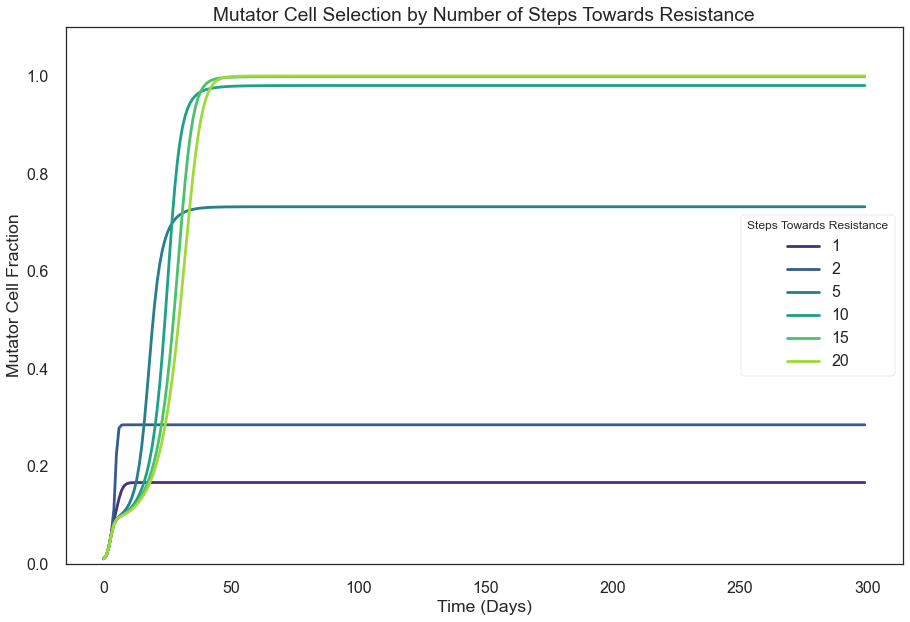

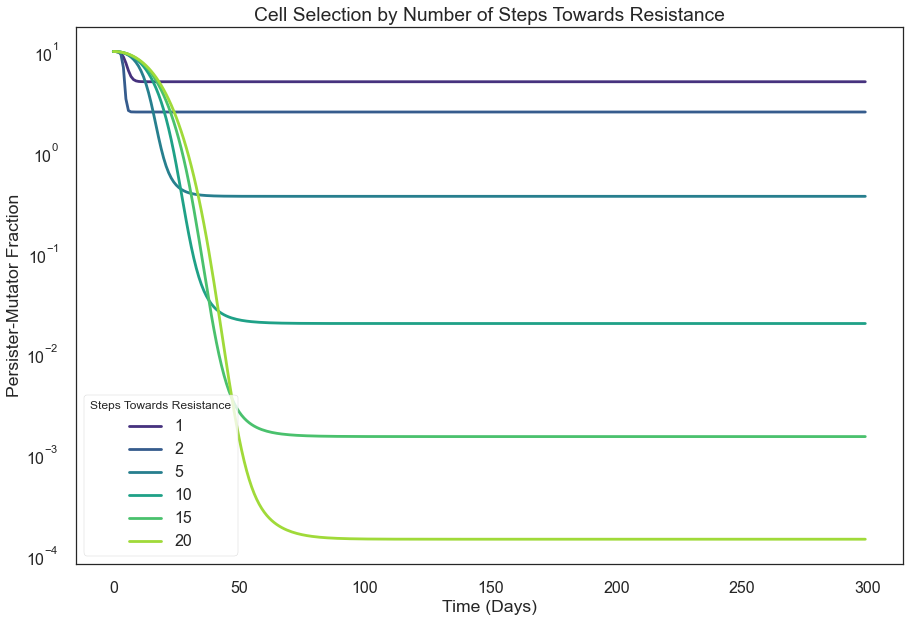

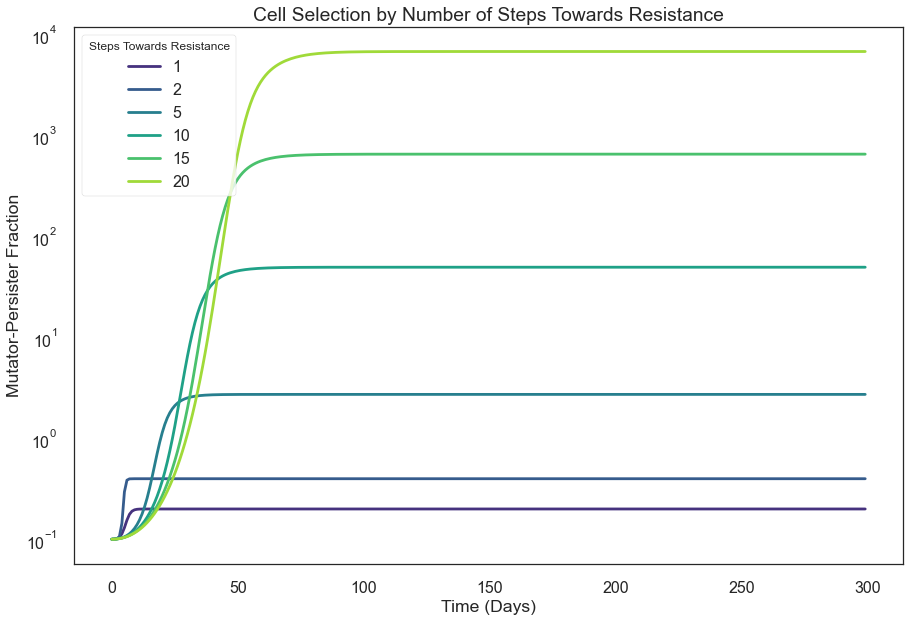

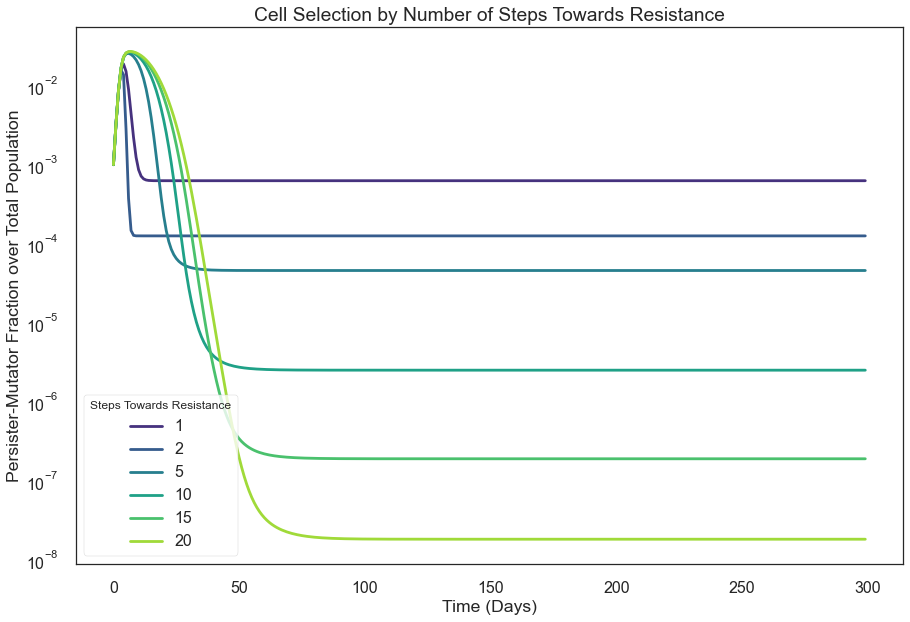

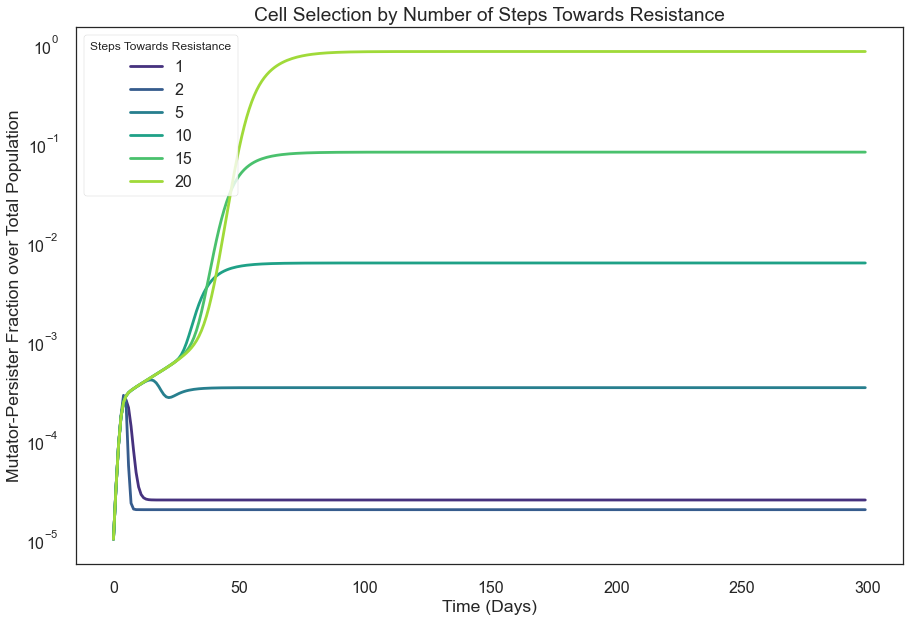

In [15]:
# 900 per 100 mut
time_steps = 300
t = np.linspace(0, time_steps, num = time_steps)
K = 10000
# N is total population
p0 =1000
m0 = 100
S = K - (p0 + m0)
title_string = 'ODE_1000_per_100_mut_death_change'
p1 = 0
m1 = 0
p2 = 0
m2 = 0
p3 = 0
m3 = 0
p4 = 0
m4 = 0
p5 = 0
m5 = 0
p6 = 0
m6 = 0
p7 = 0
m7 = 0
p8 = 0
m8 = 0
p9 = 0
m9 = 0
p10 = 0
m10 = 0
p11 = 0
m11 = 0
p12 = 0
m12 = 0
p13 = 0
m13 = 0
p14 = 0
m14 = 0
p15 = 0
m15 = 0
p16 = 0
m16 = 0
p17 = 0
m17 = 0
p18 = 0
m18 = 0
p19 = 0
m19 = 0
rp = 0
rm = 0
Gs = 0.0
D = 0.25
fR = 1.0
per_mut = (3e-3)
mut_scale = 2.0
two_step_scaling = 2
five_step_scaling = 5
ten_step_scaling = 10
fifteen_step_scaling = 15
twenty_step_scaling = 20
evol_model(t, K, p0, m0, S, p1, m1, p2, m2, p3, m3, p4, m4,
              p5, m5, p6, m6, p7, m7, p8, m8, p9, m9, p10, m10,
              p11, m11, p12, m12, p13, m13, p14, m14, p15, m15, p16, m16,
              p17, m17, p18, m18, p19, m19, rp, rm, Gs, D, fR, per_mut, mut_scale,
              two_step_scaling, five_step_scaling, ten_step_scaling, fifteen_step_scaling,
              twenty_step_scaling, title_string, time_steps)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


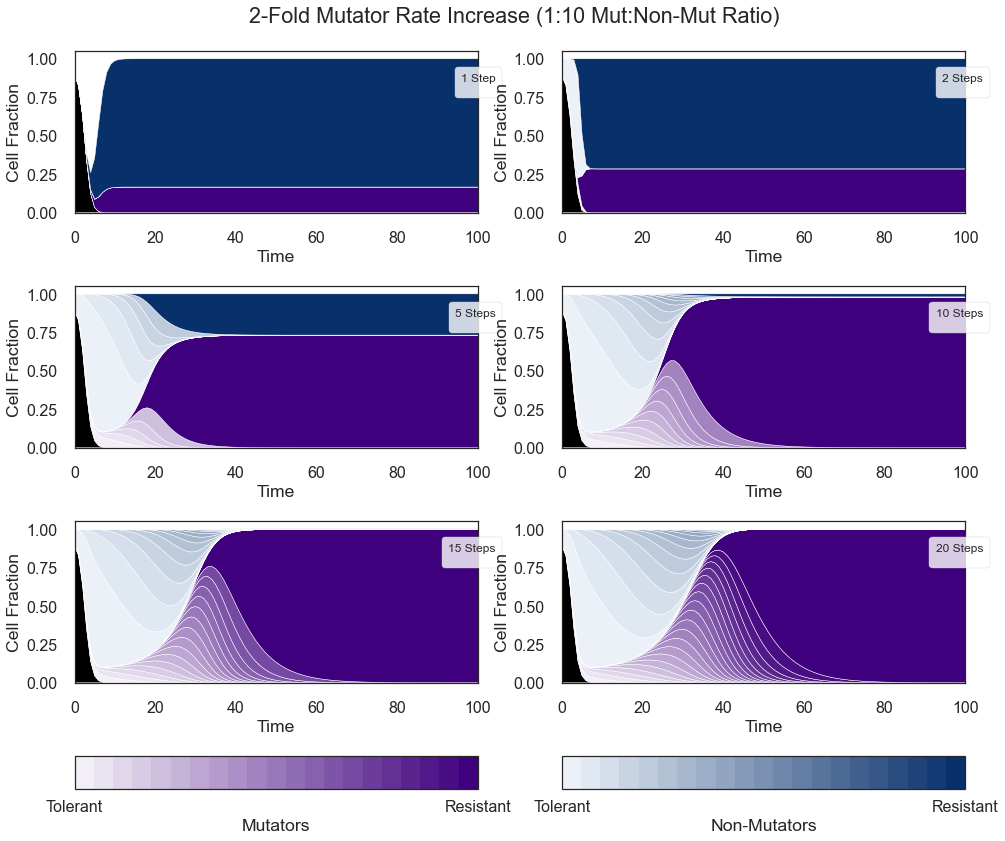

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
import numpy as np 
from sympy import *


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/single_step.csv')
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/two_steps.csv')
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/five_steps.csv')
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/ten_steps.csv')
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/fifteen_steps.csv')
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_death_change_10_17_202212_01_59/twenty_steps.csv')

df1['Time']
df1['Sensitive'] = df1['Sensitive']/df1['Total Cells']
df1['Persister'] = (df1['Total Persister Cells']-df1['Resistant Persister'])/df1['Total Cells']
df1['Mutator'] = (df1['Total Mutator Cells']-df1['Resistant Mutator'])/df1['Total Cells']
df1['Resistant'] = df1['Resistant']/df1['Total Cells']
df1['Persister0_Fraction'] = df1['Persister']/df1['Total Cells']
df1['Persister_Resistant_Fraction'] = df1['Resistant Persister']/df1['Total Cells']
df1['Mutator0_Fraction'] = df1['Mutator']/df1['Total Cells']
df1['Mutator_Resistant_Fraction'] = df1['Resistant Mutator']/df1['Total Cells']

df2['Time']
df2['Sensitive'] = df2['Sensitive']/df2['Total Cells']
df2['Persister'] = (df2['Total Persister Cells']-df2['Resistant Persister'])/df2['Total Cells']
df2['Mutator'] = (df2['Total Mutator Cells']-df2['Resistant Mutator'])/df2['Total Cells']
df2['Resistant'] = df2['Resistant']/df2['Total Cells']
df2['Persister0_Fraction'] = df2['Persister0']/df2['Total Cells']
df2['Persister1_Fraction'] = df2['Persister1']/df2['Total Cells']
df2['Persister_Resistant_Fraction'] = df2['Resistant Persister']/df2['Total Cells']
df2['Mutator0_Fraction'] = df2['Mutator0']/df2['Total Cells']
df2['Mutator1_Fraction'] = df2['Mutator1']/df2['Total Cells']
df2['Mutator_Resistant_Fraction'] = df2['Resistant Mutator']/df2['Total Cells']

df5['Time']
df5['Sensitive'] = df5['Sensitive']/df5['Total Cells']
df5['Persister'] = (df5['Total Persister Cells']-df5['Resistant Persister'])/df5['Total Cells']
df5['Mutator'] = (df5['Total Mutator Cells']-df5['Resistant Mutator'])/df5['Total Cells']
df5['Resistant'] = df5['Resistant']/df5['Total Cells']
df5['Persister0_Fraction'] = df5['Persister0']/df5['Total Cells']
df5['Persister1_Fraction'] = df5['Persister1']/df5['Total Cells']
df5['Persister2_Fraction'] = df5['Persister2']/df5['Total Cells']
df5['Persister3_Fraction'] = df5['Persister3']/df5['Total Cells']
df5['Persister4_Fraction'] = df5['Persister4']/df5['Total Cells']
df5['Persister_Resistant_Fraction'] = df5['Resistant Persister']/df5['Total Cells']
df5['Mutator0_Fraction'] = df5['Mutator0']/df5['Total Cells']
df5['Mutator1_Fraction'] = df5['Mutator1']/df5['Total Cells']
df5['Mutator2_Fraction'] = df5['Mutator2']/df5['Total Cells']
df5['Mutator3_Fraction'] = df5['Mutator3']/df5['Total Cells']
df5['Mutator4_Fraction'] = df5['Mutator4']/df5['Total Cells']
df5['Mutator_Resistant_Fraction'] = df5['Resistant Mutator']/df5['Total Cells']

df10['Time']
df10['Sensitive'] = df10['Sensitive']/df10['Total Cells']
df10['Persister'] = (df10['Total Persister Cells']-df10['Resistant Persister'])/df10['Total Cells']
df10['Mutator'] = (df10['Total Mutator Cells']-df10['Resistant Mutator'])/df10['Total Cells']
df10['Resistant'] = df10['Resistant']/df10['Total Cells']
df10['Persister0_Fraction'] = df10['Persister0']/df10['Total Cells']
df10['Persister1_Fraction'] = df10['Persister1']/df10['Total Cells']
df10['Persister2_Fraction'] = df10['Persister2']/df10['Total Cells']
df10['Persister3_Fraction'] = df10['Persister3']/df10['Total Cells']
df10['Persister4_Fraction'] = df10['Persister4']/df10['Total Cells']
df10['Persister5_Fraction'] = df10['Persister5']/df10['Total Cells']
df10['Persister6_Fraction'] = df10['Persister6']/df10['Total Cells']
df10['Persister7_Fraction'] = df10['Persister7']/df10['Total Cells']
df10['Persister8_Fraction'] = df10['Persister8']/df10['Total Cells']
df10['Persister9_Fraction'] = df10['Persister9']/df10['Total Cells']
df10['Persister_Resistant_Fraction'] = df10['Resistant Persister']/df10['Total Cells']
df10['Mutator0_Fraction'] = df10['Mutator0']/df10['Total Cells']
df10['Mutator1_Fraction'] = df10['Mutator1']/df10['Total Cells']
df10['Mutator2_Fraction'] = df10['Mutator2']/df10['Total Cells']
df10['Mutator3_Fraction'] = df10['Mutator3']/df10['Total Cells']
df10['Mutator4_Fraction'] = df10['Mutator4']/df10['Total Cells']
df10['Mutator5_Fraction'] = df10['Mutator5']/df10['Total Cells']
df10['Mutator6_Fraction'] = df10['Mutator6']/df10['Total Cells']
df10['Mutator7_Fraction'] = df10['Mutator7']/df10['Total Cells']
df10['Mutator8_Fraction'] = df10['Mutator8']/df10['Total Cells']
df10['Mutator9_Fraction'] = df10['Mutator9']/df10['Total Cells']
df10['Mutator_Resistant_Fraction'] = df10['Resistant Mutator']/df10['Total Cells']

df15['Sensitive'] = df15['Sensitive']/df15['Total Cells']
df15['Persister'] = (df15['Total Persister Cells']-df15['Resistant Persister'])/df15['Total Cells']
df15['Mutator'] = (df15['Total Mutator Cells']-df15['Resistant Mutator'])/df15['Total Cells']
df15['Resistant'] = df15['Resistant']/df15['Total Cells']
df15['Persister0_Fraction'] = df15['Persister0']/df15['Total Cells']
df15['Persister1_Fraction'] = df15['Persister1']/df15['Total Cells']
df15['Persister2_Fraction'] = df15['Persister2']/df15['Total Cells']
df15['Persister3_Fraction'] = df15['Persister3']/df15['Total Cells']
df15['Persister4_Fraction'] = df15['Persister4']/df15['Total Cells']
df15['Persister5_Fraction'] = df15['Persister5']/df15['Total Cells']
df15['Persister6_Fraction'] = df15['Persister6']/df15['Total Cells']
df15['Persister7_Fraction'] = df15['Persister7']/df15['Total Cells']
df15['Persister8_Fraction'] = df15['Persister8']/df15['Total Cells']
df15['Persister9_Fraction'] = df15['Persister9']/df15['Total Cells']
df15['Persister10_Fraction'] = df15['Persister10']/df15['Total Cells']
df15['Persister11_Fraction'] = df15['Persister11']/df15['Total Cells']
df15['Persister12_Fraction'] = df15['Persister12']/df15['Total Cells']
df15['Persister13_Fraction'] = df15['Persister13']/df15['Total Cells']
df15['Persister14_Fraction'] = df15['Persister14']/df15['Total Cells']
df15['Persister_Resistant_Fraction'] = df15['Resistant Persister']/df15['Total Cells']
df15['Mutator0_Fraction'] = df15['Mutator0']/df15['Total Cells']
df15['Mutator1_Fraction'] = df15['Mutator1']/df15['Total Cells']
df15['Mutator2_Fraction'] = df15['Mutator2']/df15['Total Cells']
df15['Mutator3_Fraction'] = df15['Mutator3']/df15['Total Cells']
df15['Mutator4_Fraction'] = df15['Mutator4']/df15['Total Cells']
df15['Mutator5_Fraction'] = df15['Mutator5']/df15['Total Cells']
df15['Mutator6_Fraction'] = df15['Mutator6']/df15['Total Cells']
df15['Mutator7_Fraction'] = df15['Mutator7']/df15['Total Cells']
df15['Mutator8_Fraction'] = df15['Mutator8']/df15['Total Cells']
df15['Mutator9_Fraction'] = df15['Mutator9']/df15['Total Cells']
df15['Mutator10_Fraction'] = df15['Mutator10']/df15['Total Cells']
df15['Mutator11_Fraction'] = df15['Mutator11']/df15['Total Cells']
df15['Mutator12_Fraction'] = df15['Mutator12']/df15['Total Cells']
df15['Mutator13_Fraction'] = df15['Mutator13']/df15['Total Cells']
df15['Mutator14_Fraction'] = df15['Mutator14']/df15['Total Cells']
df15['Mutator_Resistant_Fraction'] = df15['Resistant Mutator']/df15['Total Cells']


df20['Sensitive'] = df20['Sensitive']/df20['Total Cells']
df20['Persister'] = (df20['Total Persister Cells']-df20['Resistant Persister'])/df20['Total Cells']
df20['Mutator'] = (df20['Total Mutator Cells']-df20['Resistant Mutator'])/df20['Total Cells']
df20['Resistant'] = df20['Resistant']/df20['Total Cells']
df20['Persister0_Fraction'] = df20['Persister0']/df20['Total Cells']
df20['Persister1_Fraction'] = df20['Persister1']/df20['Total Cells']
df20['Persister2_Fraction'] = df20['Persister2']/df20['Total Cells']
df20['Persister3_Fraction'] = df20['Persister3']/df20['Total Cells']
df20['Persister4_Fraction'] = df20['Persister4']/df20['Total Cells']
df20['Persister5_Fraction'] = df20['Persister5']/df20['Total Cells']
df20['Persister6_Fraction'] = df20['Persister6']/df20['Total Cells']
df20['Persister7_Fraction'] = df20['Persister7']/df20['Total Cells']
df20['Persister8_Fraction'] = df20['Persister8']/df20['Total Cells']
df20['Persister9_Fraction'] = df20['Persister9']/df20['Total Cells']
df20['Persister10_Fraction'] = df20['Persister10']/df20['Total Cells']
df20['Persister11_Fraction'] = df20['Persister11']/df20['Total Cells']
df20['Persister12_Fraction'] = df20['Persister12']/df20['Total Cells']
df20['Persister13_Fraction'] = df20['Persister13']/df20['Total Cells']
df20['Persister14_Fraction'] = df20['Persister14']/df20['Total Cells']
df20['Persister15_Fraction'] = df20['Persister15']/df20['Total Cells']
df20['Persister16_Fraction'] = df20['Persister16']/df20['Total Cells']
df20['Persister17_Fraction'] = df20['Persister17']/df20['Total Cells']
df20['Persister18_Fraction'] = df20['Persister18']/df20['Total Cells']
df20['Persister19_Fraction'] = df20['Persister19']/df20['Total Cells']
df20['Persister_Resistant_Fraction'] = df20['Resistant Persister']/df20['Total Cells']
df20['Mutator0_Fraction'] = df20['Mutator0']/df20['Total Cells']
df20['Mutator1_Fraction'] = df20['Mutator1']/df20['Total Cells']
df20['Mutator2_Fraction'] = df20['Mutator2']/df20['Total Cells']
df20['Mutator3_Fraction'] = df20['Mutator3']/df20['Total Cells']
df20['Mutator4_Fraction'] = df20['Mutator4']/df20['Total Cells']
df20['Mutator5_Fraction'] = df20['Mutator5']/df20['Total Cells']
df20['Mutator6_Fraction'] = df20['Mutator6']/df20['Total Cells']
df20['Mutator7_Fraction'] = df20['Mutator7']/df20['Total Cells']
df20['Mutator8_Fraction'] = df20['Mutator8']/df20['Total Cells']
df20['Mutator9_Fraction'] = df20['Mutator9']/df20['Total Cells']
df20['Mutator10_Fraction'] = df20['Mutator10']/df20['Total Cells']
df20['Mutator11_Fraction'] = df20['Mutator11']/df20['Total Cells']
df20['Mutator12_Fraction'] = df20['Mutator12']/df20['Total Cells']
df20['Mutator13_Fraction'] = df20['Mutator13']/df20['Total Cells']
df20['Mutator14_Fraction'] = df20['Mutator14']/df20['Total Cells']
df20['Mutator15_Fraction'] = df20['Mutator15']/df20['Total Cells']
df20['Mutator16_Fraction'] = df20['Mutator16']/df20['Total Cells']
df20['Mutator17_Fraction'] = df20['Mutator17']/df20['Total Cells']
df20['Mutator18_Fraction'] = df20['Mutator18']/df20['Total Cells']
df20['Mutator19_Fraction'] = df20['Mutator19']/df20['Total Cells']
df20['Mutator_Resistant_Fraction'] = df20['Resistant Mutator']/df20['Total Cells']

cmap1 = ['black', '#f3eff7', '#3f007d',
          '#ecf1f8', '#08306b']
cmap2 = ['black', '#f3eff7', '#eae3f1', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#08306b']          
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap15 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']
          
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
plt.rcParams.update({'font.size': 18}) 
fig, axes = plt.subplots(4, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1/5]})
fig.subplots_adjust(bottom=0.6)
fig.suptitle('2-Fold Mutator Rate Increase (1:10 Mut:Non-Mut Ratio)')
axes[0, 0].stackplot(df1.Time, df1.Sensitive, df1.Mutator0_Fraction, 
                     df1.Mutator_Resistant_Fraction,
                     df1.Persister0_Fraction,
                     df1.Persister_Resistant_Fraction,
              colors = cmap1)
axes[0, 0].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '1 Step')              
axes[0, 1].stackplot(df2.Time, df2.Sensitive, df2.Mutator0_Fraction, 
                     df2.Mutator1_Fraction,
                     df2.Mutator_Resistant_Fraction,
                     df2.Persister0_Fraction, df2.Persister1_Fraction,
                     df2.Persister_Resistant_Fraction,
              colors = cmap2)
axes[0, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '2 Steps')              
axes[1, 0].stackplot(df5.Time, df5.Sensitive, df5.Mutator0_Fraction, 
                     df5.Mutator1_Fraction, df5.Mutator2_Fraction,
                     df5.Mutator3_Fraction, df5.Mutator4_Fraction,
                     df5.Mutator_Resistant_Fraction,
                     df5.Persister0_Fraction, df5.Persister1_Fraction, df5.Persister2_Fraction,
                     df5.Persister3_Fraction, df5.Persister4_Fraction,
                     df5.Persister_Resistant_Fraction,
              colors = cmap5)
axes[1, 0].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '5 Steps')              
axes[1, 1].stackplot(df10.Time, df10.Sensitive, df10.Mutator0_Fraction, 
                     df10.Mutator1_Fraction, df10.Mutator2_Fraction,
                     df10.Mutator3_Fraction, df10.Mutator4_Fraction, df10.Mutator5_Fraction, df10.Mutator6_Fraction,
                     df10.Mutator7_Fraction, df10.Mutator8_Fraction, df10.Mutator9_Fraction, 
                     df10.Mutator_Resistant_Fraction,
                     df10.Persister0_Fraction, df10.Persister1_Fraction, df10.Persister2_Fraction,
                     df10.Persister3_Fraction, df10.Persister4_Fraction, df10.Persister5_Fraction, df10.Persister6_Fraction,
                     df10.Persister7_Fraction, df10.Persister8_Fraction, df10.Persister9_Fraction,  
                     df10.Persister_Resistant_Fraction,
              colors = cmap10)
axes[1, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '10 Steps')              
axes[2, 0].stackplot(df15.Time, df15.Sensitive, df15.Mutator0_Fraction, 
                     df15.Mutator1_Fraction, df15.Mutator2_Fraction,
                     df15.Mutator3_Fraction, df15.Mutator4_Fraction, df15.Mutator5_Fraction, df15.Mutator6_Fraction,
                     df15.Mutator7_Fraction, df15.Mutator8_Fraction, df15.Mutator9_Fraction, df15.Mutator10_Fraction, df15.Mutator11_Fraction, 
                     df15.Mutator12_Fraction, df15.Mutator13_Fraction, df15.Mutator14_Fraction,  
                     df15.Mutator_Resistant_Fraction,
                     df15.Persister0_Fraction, df15.Persister1_Fraction, df15.Persister2_Fraction,
                     df15.Persister3_Fraction, df15.Persister4_Fraction, df15.Persister5_Fraction, df15.Persister6_Fraction,
                     df15.Persister7_Fraction, df15.Persister8_Fraction, df15.Persister9_Fraction,  df15.Persister10_Fraction, df15.Persister11_Fraction, 
                     df15.Persister12_Fraction, df15.Persister13_Fraction, df15.Persister14_Fraction,  
                     df15.Persister_Resistant_Fraction,
              colors = cmap15)
axes[2, 0].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '15 Steps')                                    
axes[2, 1].stackplot(df20.Time, df20.Sensitive, df20.Mutator0_Fraction, 
                     df20.Mutator1_Fraction, df20.Mutator2_Fraction,
                     df20.Mutator3_Fraction, df20.Mutator4_Fraction, df20.Mutator5_Fraction, df20.Mutator6_Fraction,
                     df20.Mutator7_Fraction, df20.Mutator8_Fraction, df20.Mutator9_Fraction, df20.Mutator10_Fraction, df20.Mutator11_Fraction, 
                     df20.Mutator12_Fraction, df20.Mutator13_Fraction, df20.Mutator14_Fraction, df20.Mutator15_Fraction, df20.Mutator16_Fraction,
                     df20.Mutator17_Fraction, df20.Mutator18_Fraction, df20.Mutator19_Fraction,   
                     df20.Mutator_Resistant_Fraction,
                     df20.Persister0_Fraction, df20.Persister1_Fraction, df20.Persister2_Fraction,
                     df20.Persister3_Fraction, df20.Persister4_Fraction, df20.Persister5_Fraction, df20.Persister6_Fraction,
                     df20.Persister7_Fraction, df20.Persister8_Fraction, df20.Persister9_Fraction,  df20.Persister10_Fraction, df20.Persister11_Fraction, 
                     df20.Persister12_Fraction, df20.Persister13_Fraction, df20.Persister14_Fraction, df20.Persister15_Fraction, df20.Persister16_Fraction,
                     df20.Persister17_Fraction, df20.Persister18_Fraction, df20.Persister19_Fraction,   
                     df20.Persister_Resistant_Fraction,
              colors = cmap20)
axes[2, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0, title = '20 Steps')
cols1 = ['#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d']
vals1 = list(range(len(cols1)))
bounds1 = np.append(vals1, vals1[-1] + 1)
cmap1 = ListedColormap(cols1)
norm1 = BoundaryNorm(bounds1, ncolors=len(cols1))

cols2 = ['#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b'
          ]
vals2 = list(range(len(cols2)))
bounds2 = np.append(vals2, vals2[-1] + 1)
cmap2 = ListedColormap(cols2)
norm2 = BoundaryNorm(bounds2, ncolors=len(cols2))
cbar = fig.colorbar(ScalarMappable(norm=norm1, cmap=cmap1),
             cax=axes[3, 0], orientation='horizontal', label='Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 0].tick_params(size=0)          
cbar = fig.colorbar(ScalarMappable(norm=norm2, cmap=cmap2),
             cax=axes[3, 1], orientation='horizontal', label='Non-Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 1].tick_params(size=0)
axes[0, 0].set_ylabel('Cell Fraction')
axes[0, 0].set_xlabel('Time')
axes[0, 1].set_ylabel('Cell Fraction')
axes[0, 1].set_xlabel('Time')
axes[1, 0].set_ylabel('Cell Fraction')
axes[1, 0].set_xlabel('Time')
axes[1, 1].set_ylabel('Cell Fraction')
axes[1, 1].set_xlabel('Time') 
axes[2, 0].set_ylabel('Cell Fraction')
axes[2, 0].set_xlabel('Time')
axes[2, 1].set_ylabel('Cell Fraction')
axes[2, 1].set_xlabel('Time')
axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 100])
axes[1, 0].set_xlim([0, 100])  
axes[1, 1].set_xlim([0, 100])  
axes[2, 0].set_xlim([0, 100])  
axes[2, 1].set_xlim([0, 100])  
plt.tight_layout()
plt.savefig('1:10_death_scaled.pdf', bbox_inches='tight')
plt.show()
